In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
Path = 'Medical_Device_Failure_dataset.csv'
df = pd.read_csv(Path)


In [77]:

# 1. Basic Information
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Shape of dataset: (4000, 13)

Columns: ['Device_ID', 'Device_Type', 'Purchase_Date', 'Manufacturer', 'Model', 'Country', 'Maintenance_Report', 'Age', 'Maintenance_Cost', 'Downtime', 'Maintenance_Frequency', 'Failure_Event_Count', 'Maintenance_Class']

Data Types:
 Device_ID                 object
Device_Type               object
Purchase_Date             object
Manufacturer              object
Model                     object
Country                   object
Maintenance_Report        object
Age                      float64
Maintenance_Cost         float64
Downtime                 float64
Maintenance_Frequency      int64
Failure_Event_Count        int64
Maintenance_Class          int64
dtype: object


In [78]:

# 2. Missing Values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing %': missing_percent})
print("\nMissing Values:\n", missing_data)



Missing Values:
                        Missing Values  Missing %
Device_ID                           0        0.0
Device_Type                         0        0.0
Purchase_Date                       0        0.0
Manufacturer                        0        0.0
Model                               0        0.0
Country                             0        0.0
Maintenance_Report                  0        0.0
Age                                 0        0.0
Maintenance_Cost                    0        0.0
Downtime                            0        0.0
Maintenance_Frequency               0        0.0
Failure_Event_Count                 0        0.0
Maintenance_Class                   0        0.0


In [79]:

# 3. Summary Statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
                Age  Maintenance_Cost     Downtime  Maintenance_Frequency  \
count  4000.000000       4000.000000  4000.000000            4000.000000   
mean      6.510566       6595.235540    16.494776               3.499750   
std       3.498912       2983.142117    10.772687               1.380028   
min       0.000000       1000.000000     0.000000               1.000000   
25%       3.817204       4191.883295     7.702360               2.000000   
50%       6.277726       6218.849140    13.778273               3.000000   
75%       9.126599       8944.237341    24.097047               5.000000   
max      15.000000      16235.825805    62.795603               6.000000   

       Failure_Event_Count  Maintenance_Class  
count          4000.000000        4000.000000  
mean              3.496750           1.500000  
std               2.507302           1.118174  
min               0.000000           0.000000  
25%               2.000000           0.750000  
50%  

In [80]:

# 4. Unique values count
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



Unique values in each column:
Device_ID: 4000
Device_Type: 4
Purchase_Date: 4000
Manufacturer: 4
Model: 4
Country: 5
Maintenance_Report: 5
Age: 3889
Maintenance_Cost: 3984
Downtime: 3973
Maintenance_Frequency: 6
Failure_Event_Count: 10
Maintenance_Class: 4


In [81]:

# 5. Target variable distribution (Maintenance_Class)
print("\nMaintenance_Class distribution:\n", df['Maintenance_Class'].value_counts())



Maintenance_Class distribution:
 Maintenance_Class
0    1000
3    1000
2    1000
1    1000
Name: count, dtype: int64


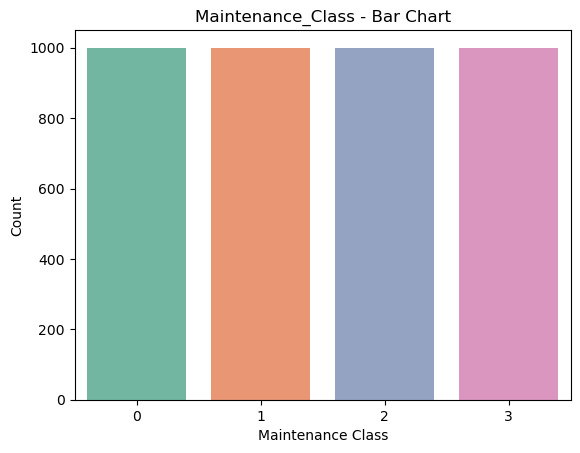

In [82]:

## a) Bar chart
sns.countplot(x='Maintenance_Class', data=df, palette="Set2")
plt.title("Maintenance_Class - Bar Chart")
plt.xlabel("Maintenance Class")
plt.ylabel("Count")
plt.show()


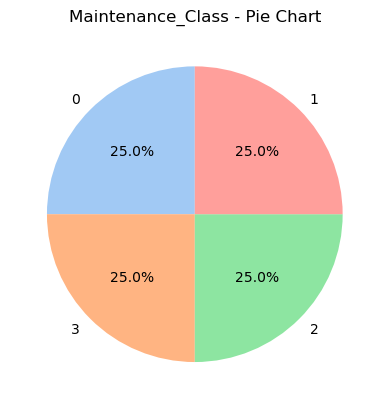

In [83]:

## b) Pie chart
df['Maintenance_Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Maintenance_Class - Pie Chart")
plt.ylabel("")
plt.show()


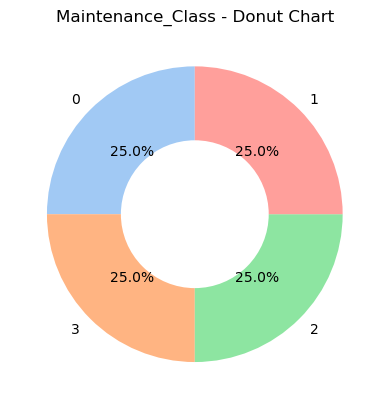

In [84]:

## c) Donut chart
labels = df['Maintenance_Class'].value_counts().index
sizes = df['Maintenance_Class'].value_counts().values
colors = sns.color_palette("pastel")
plt.pie(sizes, labels=labels, colors=colors, wedgeprops=dict(width=0.5), autopct='%1.1f%%', startangle=90)
plt.title("Maintenance_Class - Donut Chart")
plt.show()


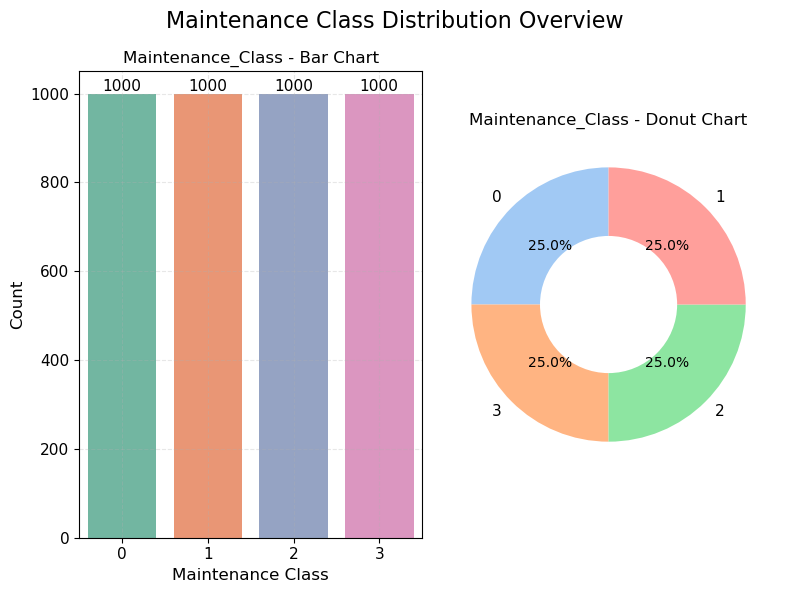

In [118]:
# Font size settings (adjust these values as needed)
title_fontsize = 12
label_fontsize = 12
tick_fontsize = 11
suptitle_fontsize = 16
pie_label_fontsize = 11
pie_percent_fontsize = 10

# Figure size settings
fig_width = 8
fig_height = 6

# Create subplots - 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))
fig.suptitle('Maintenance Class Distribution Overview', fontsize=suptitle_fontsize, y=0.98)

# Bar chart (left subplot)
sns.countplot(x='Maintenance_Class', data=df, palette="Set2", ax=ax1)
ax1.set_title("Maintenance_Class - Bar Chart", fontsize=title_fontsize)
ax1.set_xlabel("Maintenance Class", fontsize=label_fontsize)
ax1.set_ylabel("Count", fontsize=label_fontsize)
ax1.tick_params(axis='both', labelsize=tick_fontsize)
ax1.grid(True, linestyle='--', alpha=0.3)

# Add value labels on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fontsize=tick_fontsize)

# Donut chart (right subplot)
labels = df['Maintenance_Class'].value_counts().index
sizes = df['Maintenance_Class'].value_counts().values
colors = sns.color_palette("pastel")

wedges, texts, autotexts = ax2.pie(sizes, 
                                   labels=labels, 
                                   colors=colors, 
                                   wedgeprops=dict(width=0.5), 
                                   autopct='%1.1f%%', 
                                   startangle=90,
                                   textprops={'fontsize': pie_label_fontsize})

# Adjust percentage text font size
for autotext in autotexts:
    autotext.set_fontsize(pie_percent_fontsize)

ax2.set_title("Maintenance_Class - Donut Chart", fontsize=title_fontsize)

plt.tight_layout()
plt.show()

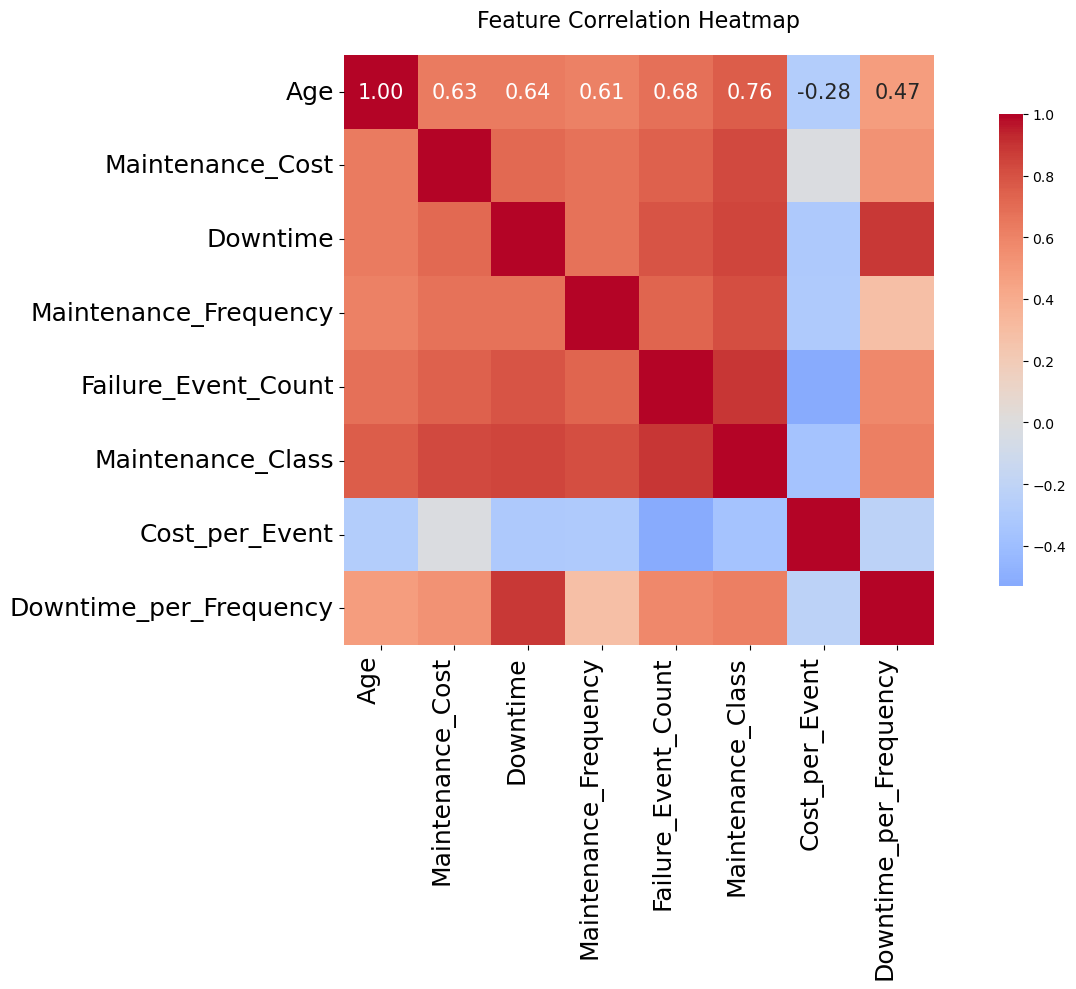

In [122]:

# 6. Correlation Heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            annot_kws={'size': 15}, # Font size for correlation values
            fmt='.2f',            # Format to 2 decimal places
            cmap='coolwarm', 
            center=0,             # Center colormap at 0
            square=True,          # Make cells square-shaped
            cbar_kws={'shrink': 0.8})  # Adjust colorbar size
plt.title("Feature Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=90, ha='right', fontsize=18)  # Rotate x-axis labels with custom size
plt.yticks(rotation=0, fontsize=18)               # Keep y-axis labels horizontal with custom size
plt.tight_layout()                   # Adjust layout to prevent label cutoff
plt.show()

c:\Users\akvsk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\akvsk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\akvsk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\akvsk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

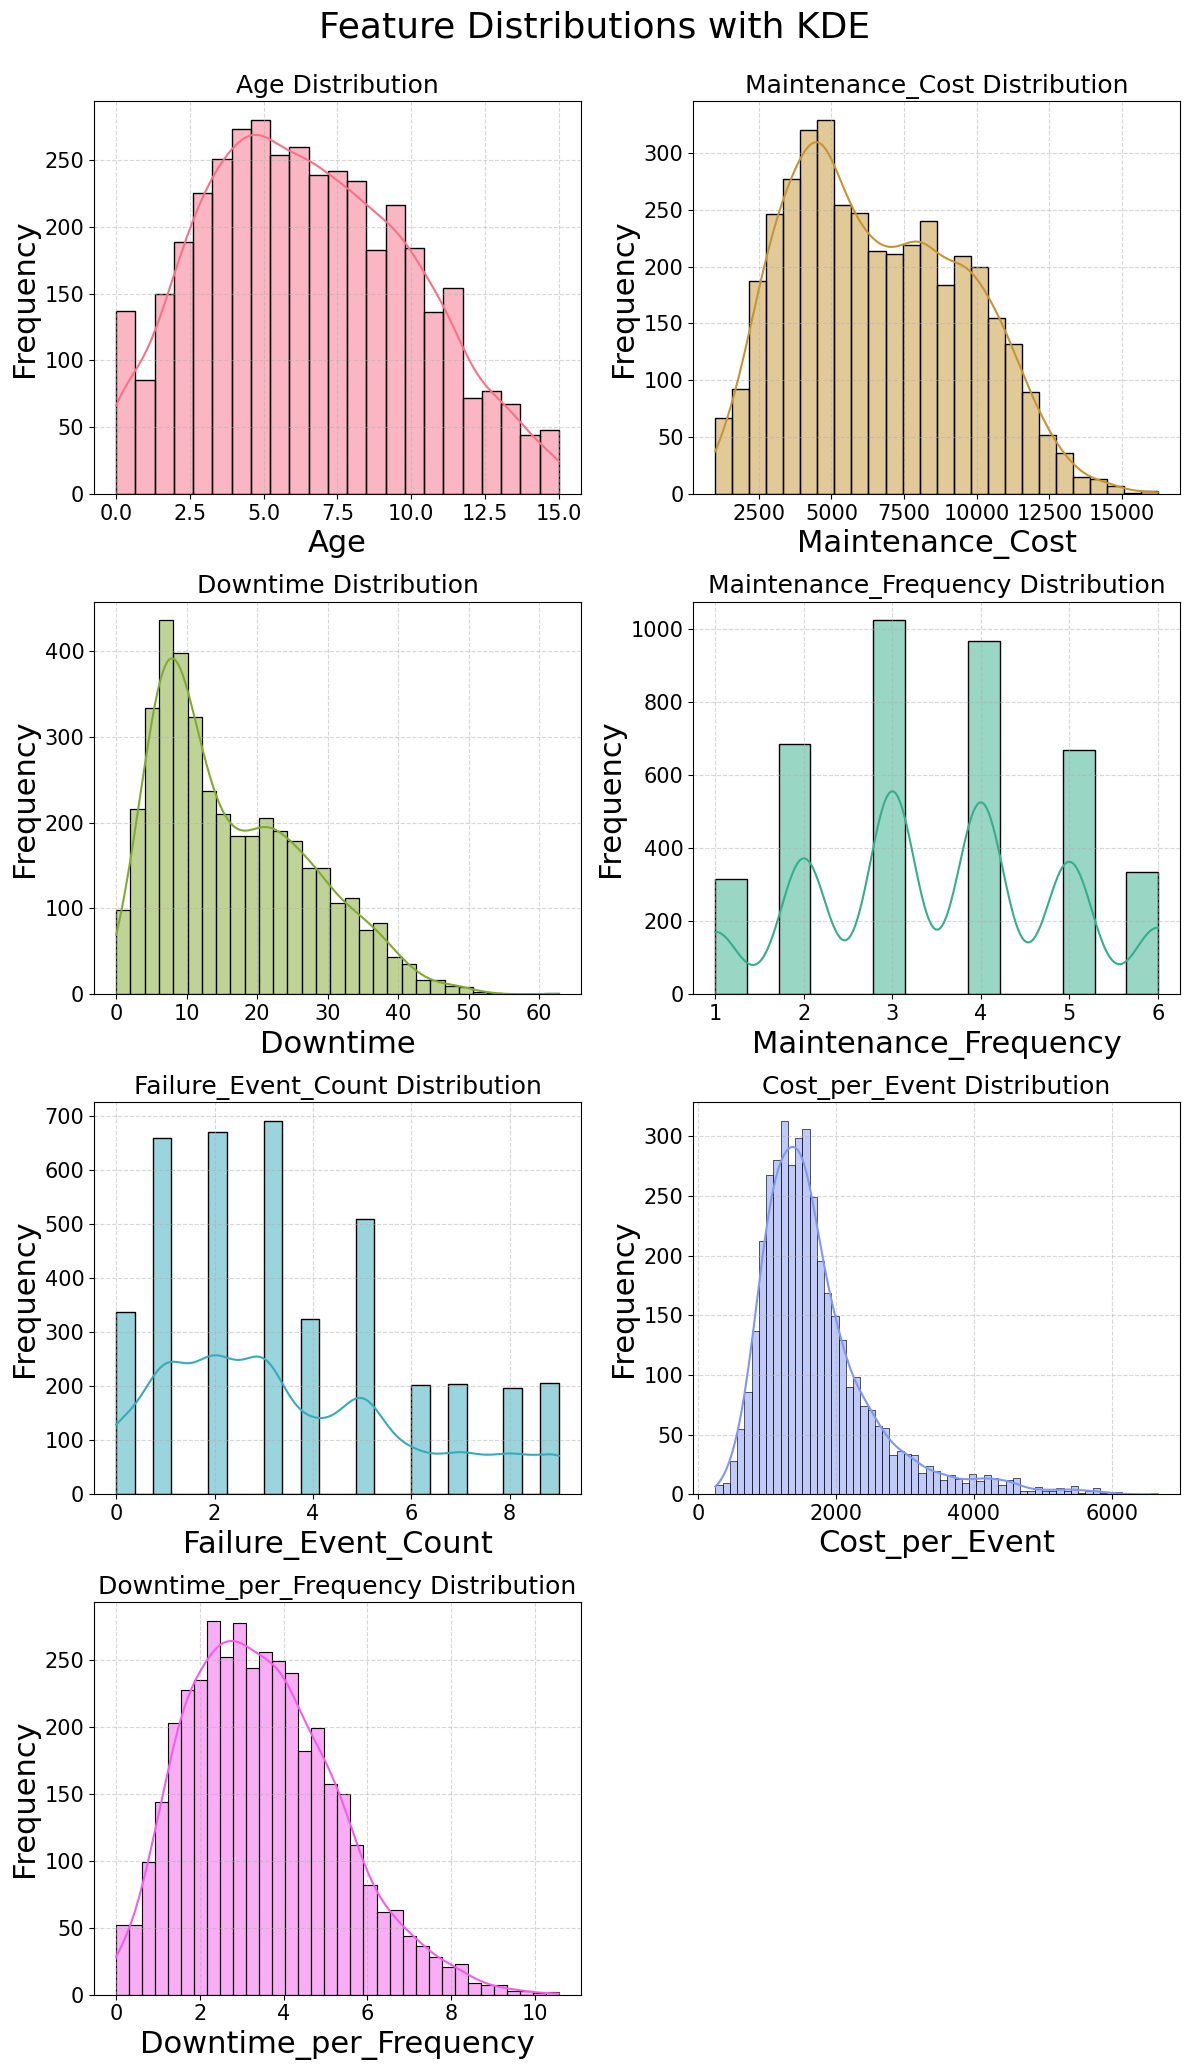

In [111]:
# 7. Derived Features
features = ['Age', 'Maintenance_Cost', 'Downtime', 'Maintenance_Frequency', 'Failure_Event_Count']

# Add derived features
df['Cost_per_Event'] = df['Maintenance_Cost'] / (df['Failure_Event_Count'] + 1)
df['Downtime_per_Frequency'] = df['Downtime'] / (df['Maintenance_Frequency'] + 1)

features += ['Cost_per_Event', 'Downtime_per_Frequency']

# Font size settings (adjust these values as needed)
title_fontsize = 18
label_fontsize = 22
tick_fontsize = 15
suptitle_fontsize = 26

# Figure size settings (adjust these values as needed)
fig_width = 12
fig_height_per_row = 5

# 🎨 Color palette
husl_colors = sns.color_palette("husl", len(features))

# Calculate subplot grid dimensions
n_features = len(features)
n_cols = 2  # Set to 2 columns as requested
n_rows = 5  # Set to 4 rows as requested

# 📊 Create subplots for all histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height_per_row * n_rows))
fig.suptitle('Feature Distributions with KDE', fontsize=suptitle_fontsize, y=1)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot histograms
for idx, feature in enumerate(features):
    color = husl_colors[idx % len(husl_colors)]
    sns.histplot(df[feature].dropna(), kde=True, color=color, ax=axes[idx])
    axes[idx].set_title(f"{feature} Distribution", fontsize=title_fontsize)
    axes[idx].set_xlabel(feature, fontsize=label_fontsize)
    axes[idx].set_ylabel("Frequency", fontsize=label_fontsize)
    axes[idx].tick_params(axis='both', labelsize=tick_fontsize)
    axes[idx].grid(True, linestyle='--', alpha=0.5)

# Hide empty subplots if any
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

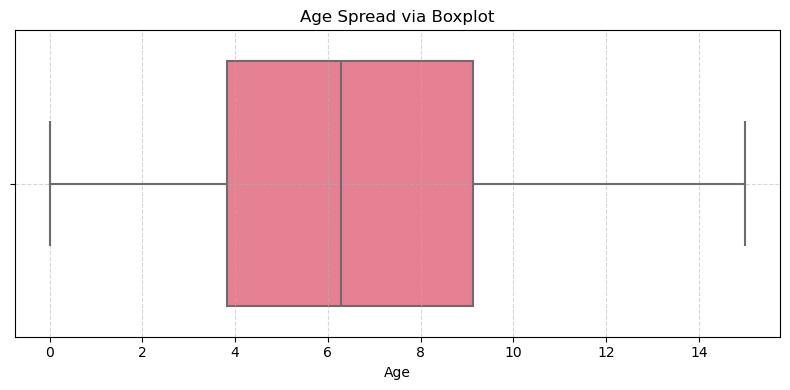

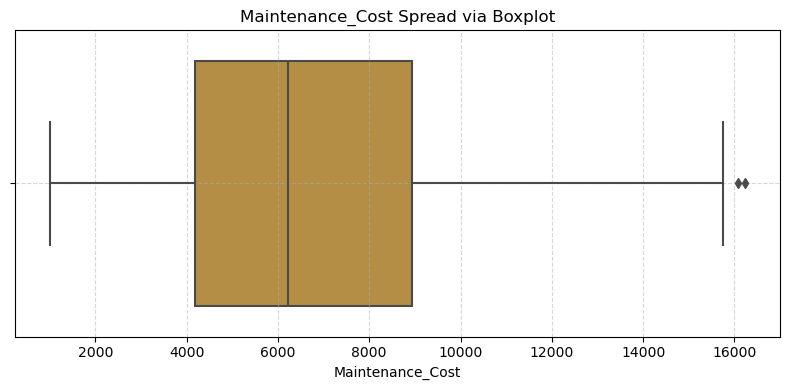

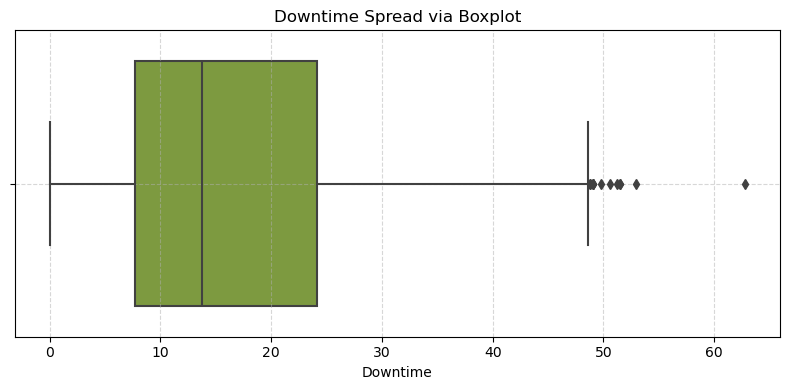

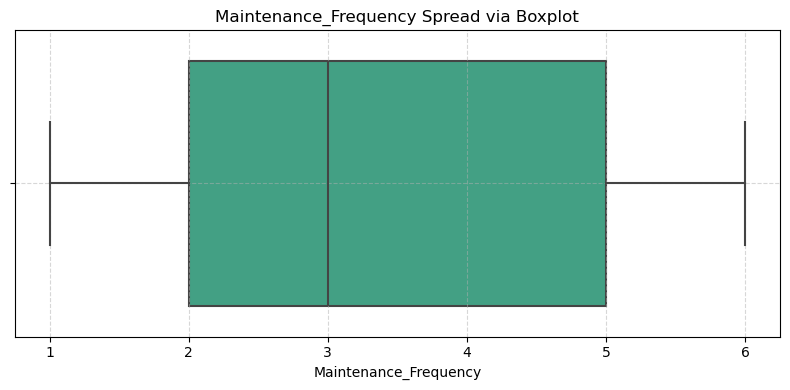

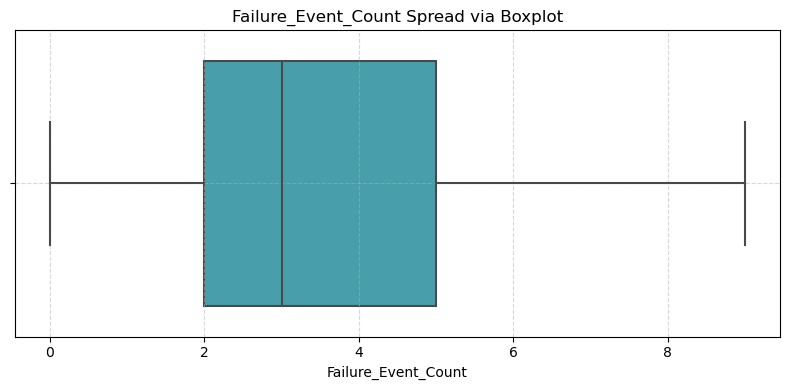

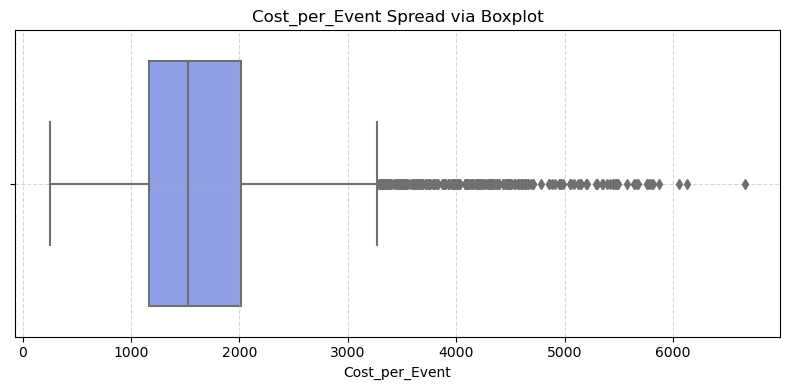

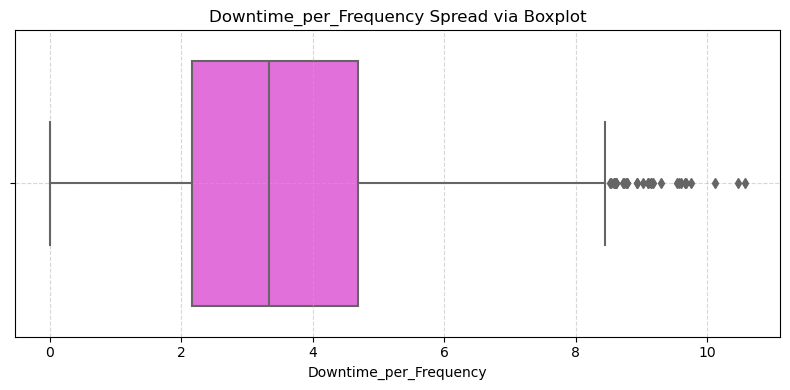

In [87]:

# 8. Boxplots for Spread (not for outliers)
for idx, feature in enumerate(features):
    plt.figure(figsize=(8, 4))
    color = husl_colors[idx % len(husl_colors)]
    sns.boxplot(x=df[feature].dropna(), color=color)
    plt.title(f"{feature} Spread via Boxplot")
    plt.xlabel(feature)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

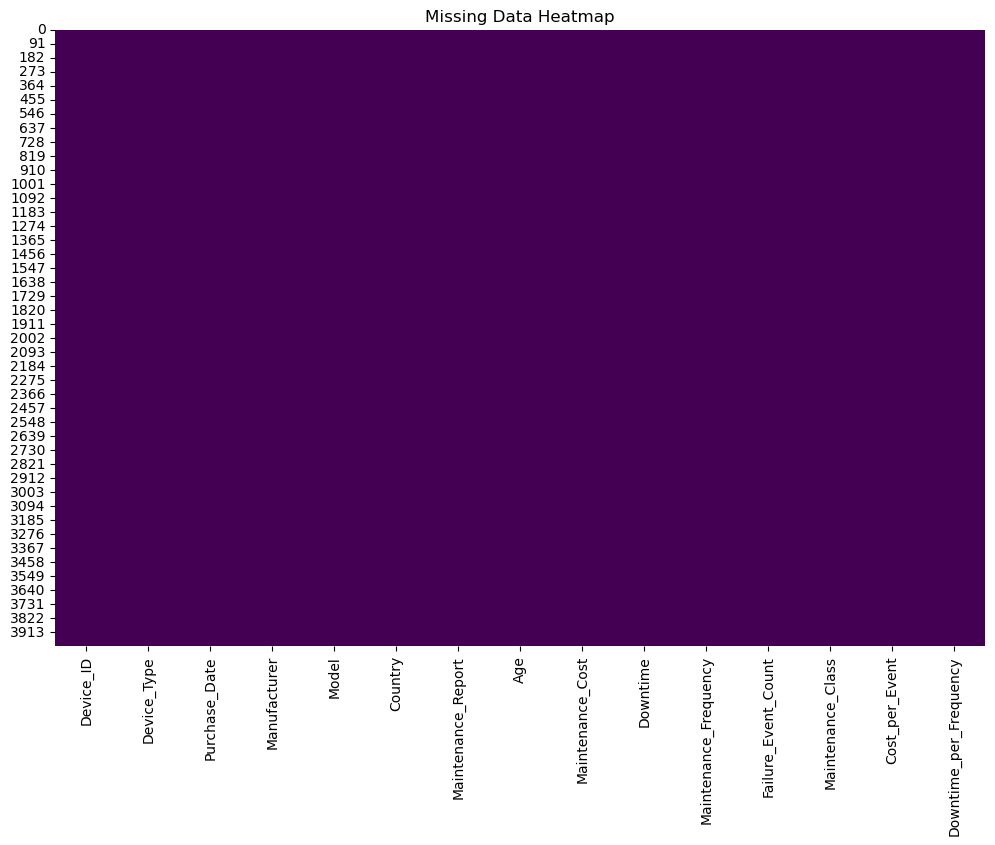

In [88]:

# 9. Missing Data Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()
